In [6]:
import numpy as np
# Importer la librairie standart Qiskit
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

<IPython.core.display.Latex object>

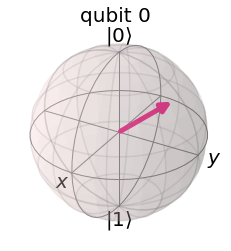

In [7]:
# Creer un un état arbitraire d`un seul qubit
psi = random_statevector(2)
# Afficher l`état |Ψ⟩= α|0⟩+β|1⟩
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# visualiser dans la sphère de Bloch
plot_bloch_multivector(psi)

In [8]:
# initialization   
init_gate = Initialize(psi)
init_gate.label = "init"

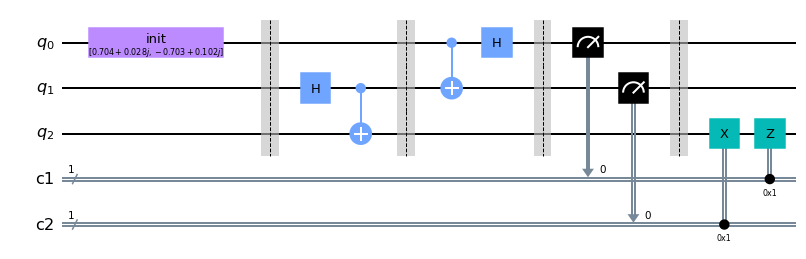

In [13]:
#Utiliser le simulateur (Aer) pour verifier que l`etat préparé est téléporté 
q =  QuantumRegister(3,"q")#configurer le systeme avec 3 qubits:
# q[0] décrit l'état souhaité à téléporter, q[1] d`Alice,q[2] de Bob
c1 = ClassicalRegister(1,"c1") 
c2 = ClassicalRegister(1,"c2") 
qc = QuantumCircuit(q,c1,c2)#créer un circuit constitué de 3 qubit et 2 bits
# Initialiser le qubit[0] ou le message est stocké d'Alice
qc.append(init_gate, [0])
qc.barrier()
# Mettre q[1] et q[2] en intrication
qc.h(q[1])
qc.cx(q[1],q[2])
qc.barrier()
# Appliquer la porte CNOT  sur le qubit d`Alice  
qc.cx(q[0],q[1])
# Appliquer la porte Hadamard 
qc.h(q[0])
qc.barrier()
# Mesure effectuée par Alice et stocker le resultat dans deux bits classiques
qc.measure(q[0],c1)
qc.measure(q[1],c2)
qc.barrier()
# D`apres l`etat d`Alice  Bob peut récuperer l'état téléporté
qc.x(q[2]).c_if(c2,1)# utiliser pour controler les portes X et Z avec les bits classiques
qc.z(q[2]).c_if(c1,1)
qc.draw()#Afficher le circuit


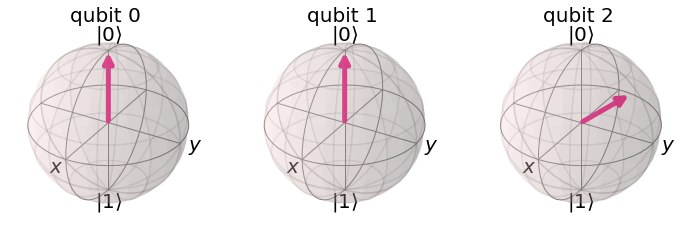

In [14]:
# Récuper l`etat teleporter par Bob q[2]
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)